<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Aplicando Python para análisis de precios: descarga, manejo y análisis de datos</font> </center>



<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
!pip install pandas-datareader

    - conda install -c anaconda pandas-datareader
    - conda install -c conda-forge yfinance
    - conda install -c conda-forge frozendict

In [ ]:
#!pip install pandas-datareader

In [ ]:
#!pip install yfinance

In [2]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
from pandas_datareader import data as web

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import yfinance

In [4]:
yfinance.pdr_override()

Ver la siguiente función...

In [8]:
data_ibm = web.get_data_yahoo(['IBM'], start= '2011-01-01', end ='2022-01-01', interval = '1d')


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,140.736145,141.682602,140.669220,140.994263,89.928505,4815575
2011-01-04,141.070740,141.701721,140.191208,141.147232,90.026047,5292865
2011-01-05,140.860428,140.994263,140.277252,140.583176,89.666298,4871640
2011-01-06,140.659653,142.246658,140.363297,142.122375,90.648041,5260543
2011-01-07,142.246658,142.313583,140.478012,141.424469,90.202904,4325942
...,...,...,...,...,...,...
2021-12-27,130.630005,131.649994,129.949997,131.619995,122.212708,4293900
2021-12-28,131.600006,133.220001,131.589996,132.630005,123.150536,3445200
2021-12-29,132.399994,134.210007,132.300003,133.350006,123.819077,4239900


In [9]:
data_ibm['Adj Close']

Date
2011-01-03     89.928505
2011-01-04     90.026047
2011-01-05     89.666298
2011-01-06     90.648041
2011-01-07     90.202904
                 ...    
2021-12-27    122.212708
2021-12-28    123.150536
2021-12-29    123.819077
2021-12-30    124.339050
2021-12-31    124.106903
Name: Adj Close, Length: 2769, dtype: float64

In [10]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_data = None, end_data=None):
    closes = web.get_data_yahoo(tickers, start= start_data, end =end_data, interval = '1d')['Close']
    return closes

In [11]:
# Instrumentos a descargar (Apple, Walmart, IBM, Nike)
names = ['AAPL', 'WMT', 'IBM', 'NKE']
start = '2011-01-01'
end = '2022-01-01'

In [12]:
# Obtenemos los precios ajustados en el cierre
closes = get_closes(tickers=names, start_data = start, end_data=end)
closes.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-03,11.770357,140.994263,21.522499,54.560001
2011-01-04,11.831786,141.147232,20.992500,54.770000
2011-01-05,11.928571,140.583176,21.129999,54.410000
2011-01-06,11.918929,142.122375,20.940001,53.959999
2011-01-07,12.004286,141.424469,20.882500,54.080002


In [13]:
# Observemos los primeros datos
closes.tail()

,AAPL,IBM,NKE,WMT
Date,,,,
2021-12-27,180.330002,131.619995,167.580002,140.759995
2021-12-28,179.289993,132.630005,166.419998,142.779999
2021-12-29,179.380005,133.350006,168.779999,142.710007
2021-12-30,178.199997,133.910004,167.490005,143.169998
2021-12-31,177.570007,133.660004,166.669998,144.690002


In [15]:
closes.head()

,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-03,11.770357,140.994263,21.522499,54.560001
2011-01-04,11.831786,141.147232,20.992500,54.770000
2011-01-05,11.928571,140.583176,21.129999,54.410000
2011-01-06,11.918929,142.122375,20.940001,53.959999
2011-01-07,12.004286,141.424469,20.882500,54.080002


In [14]:
# Observemos los últimos datos
closes.iloc[0,1]

140.9942626953125

In [16]:
closes.loc['2011-01-03','IBM']

140.9942626953125

¿Cómo lucen estos datos?

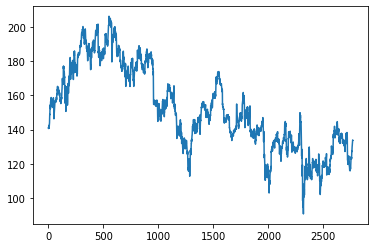

In [17]:
# Graficar
plt.plot(closes['IBM'].values)

<AxesSubplot:xlabel='Date'>

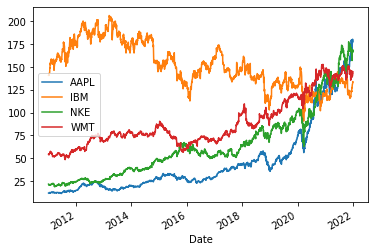

In [18]:
closes.plot()

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [20]:
# Método describe
closes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2011-01-03 to 2021-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2769 non-null   float64
 1   IBM     2769 non-null   float64
 2   NKE     2769 non-null   float64
 3   WMT     2769 non-null   float64
dtypes: float64(4)
memory usage: 172.7 KB


In [21]:
closes.describe()

,AAPL,IBM,NKE,WMT
count,2769.000000,2769.000000,2769.000000,2769.000000
mean,45.764080,151.856127,64.001032,87.963026
std,38.356649,24.397167,37.792819,27.135412
min,11.261429,90.602295,18.862499,48.410000
25%,20.463572,133.556412,35.439999,69.989998
50%,29.817499,148.346085,55.410000,77.510002
75%,51.040001,173.718933,83.000000,102.080002
max,180.330002,206.309753,177.509995,152.789993


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [23]:
cls = closes['IBM']
cls

Date
2011-01-03    140.994263
2011-01-04    141.147232
2011-01-05    140.583176
2011-01-06    142.122375
2011-01-07    141.424469
                 ...    
2021-12-27    131.619995
2021-12-28    132.630005
2021-12-29    133.350006
2021-12-30    133.910004
2021-12-31    133.660004
Name: IBM, Length: 2769, dtype: float64

In [27]:
R_0 = (cls[1] - cls[0])/cls[0]
R_0

0.0010849332265535378

In [ ]:
# Método pct_change


y la gráfica de los rendimientos se puede obtener como...

In [ ]:
# Gráfica


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [ ]:
closes.head()

In [ ]:
# Rendimiento logarítmico


In [ ]:
# Gráfica


In [ ]:
# Valor absoluto de la diferencia


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [ ]:
# Media y volatilidad de rendimientos
log_returns.std()

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.